In [25]:

import kagglehub
michaelhakim_walmart_sales_analysis_path = kagglehub.dataset_download('michaelhakim/walmart-sales-analysis')

print('Data source import complete.')


Data source import complete.


#  STEP 1: Load Dataset & Initial Overview

## 1. Libraries

In [26]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-analysis/Walmart_sales_Dashboard.pbix
/kaggle/input/walmart-sales-analysis/Walmart Sales Analysis And Marketing Recommendations.pdf
/kaggle/input/walmart-sales-analysis/Walmart_sales_analysis.csv


## 2. Display Settings

In [27]:
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

## 3. Load Dataset

In [28]:
df = pd.read_csv('/kaggle/input/walmart-sales-analysis/Walmart_sales_analysis.csv')

## 4. First Look

In [29]:
df.shape

(6435, 8)

In [30]:
df.columns

Index(['Store_Number', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', ' CPI ', 'Unemployment'],
      dtype='object')

In [31]:
df.head()

Store_Number       Date Weekly_Sales  Holiday_Flag  Temperature  \
0             1   2/5/2010    1,643,691             0        42.31   
1             1  2/12/2010    1,641,957             1        38.51   
2             1  2/19/2010    1,611,968             0        39.93   
3             1  2/26/2010    1,409,728             0        46.63   
4             1   3/5/2010    1,554,807             0        46.50   

   Fuel_Price   CPI   Unemployment  
0       2.572    211         8.106  
1       2.548    211         8.106  
2       2.514    211         8.106  
3       2.561    211         8.106  
4       2.625    211         8.106

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store_Number  6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   object 
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6    CPI          6435 non-null   int64  
 7   Unemployment  6435 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 402.3+ KB


In [33]:
df.describe()

Store_Number  Holiday_Flag  Temperature   Fuel_Price         CPI   \
count   6435.000000   6435.000000  6435.000000  6435.000000  6435.000000   
mean      23.000000      0.069930    60.663782     3.358607   171.583994   
std       12.988182      0.255049    18.444933     0.459020    39.351305   
min        1.000000      0.000000    -2.060000     2.472000   126.000000   
25%       12.000000      0.000000    47.460000     2.933000   132.000000   
50%       23.000000      0.000000    62.670000     3.445000   183.000000   
75%       34.000000      0.000000    74.940000     3.735000   213.000000   
max       45.000000      1.000000   100.140000     4.468000   227.000000   

       Unemployment  
count   6435.000000  
mean       7.999151  
std        1.875885  
min        3.879000  
25%        6.891000  
50%        7.874000  
75%        8.622000  
max       14.313000

In [34]:
df.nunique()

Store_Number      45
Date             143
Weekly_Sales    6427
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
 CPI              62
Unemployment     349
dtype: int64

# STEP 2: Missing Values & Data Cleaning

## Check missing values

In [35]:
df.isnull().sum()

Store_Number    0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
 CPI            0
Unemployment    0
dtype: int64

## Check duplicates

In [36]:
df.duplicated().sum()

np.int64(0)

## Drop duplicates

In [37]:
df.drop_duplicates(inplace=True)

## Clean column names

In [38]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# STEP 3: Date Conversion & Feature Engineering

## Convert 'date' column to datetime

In [39]:
df['date'] = pd.to_datetime(df['date'])

## Extract new features

In [40]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()

# STEP 4: Exploratory Data Analysis (EDA)

## 1. Distribution of Sales

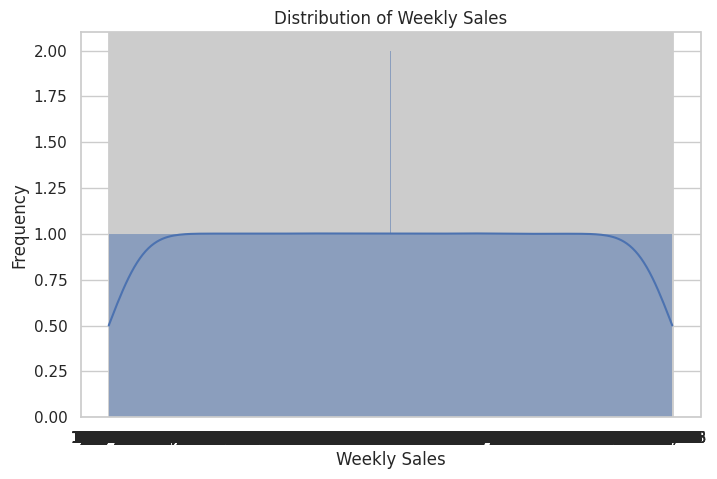

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['weekly_sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

## 2. Sales by Year

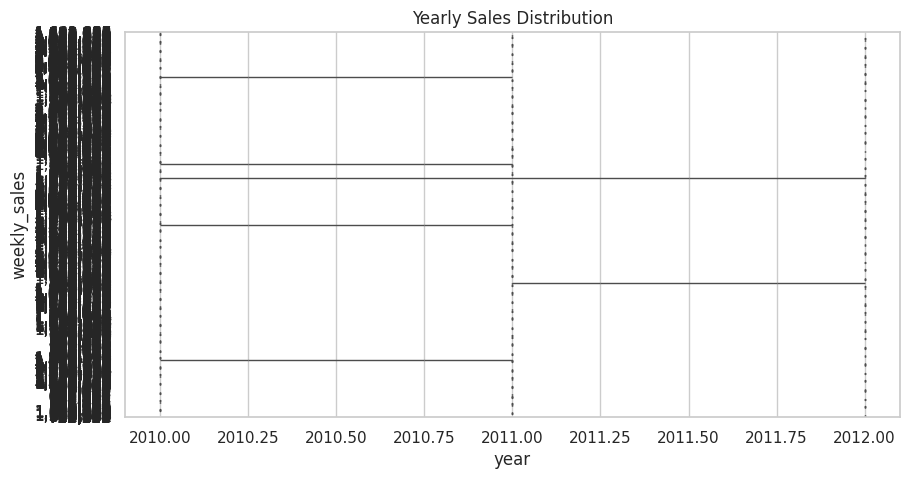

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='weekly_sales', data=df)
plt.title('Yearly Sales Distribution')
plt.show()

## 3. Sales by Holiday Flag

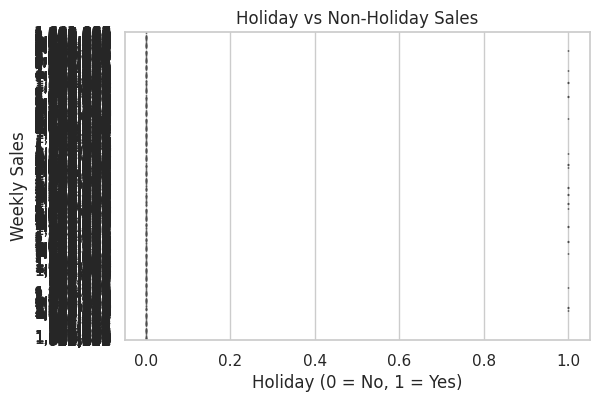

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='holiday_flag', y='weekly_sales', data=df)
plt.title('Holiday vs Non-Holiday Sales')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Weekly Sales')
plt.show()

# STEP 5: Categorical & Numerical Feature Analysis

## Sales by Department

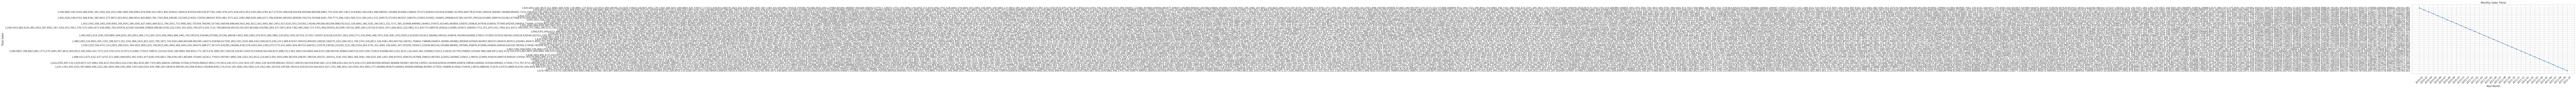

In [20]:
monthly_sales = df.groupby(['year', 'month'])['weekly_sales'].sum().reset_index()

monthly_sales['year_month'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)

plt.figure(figsize=(14,6))
sns.lineplot(x='year_month', y='weekly_sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


# STEP 6: Correlation Matrix

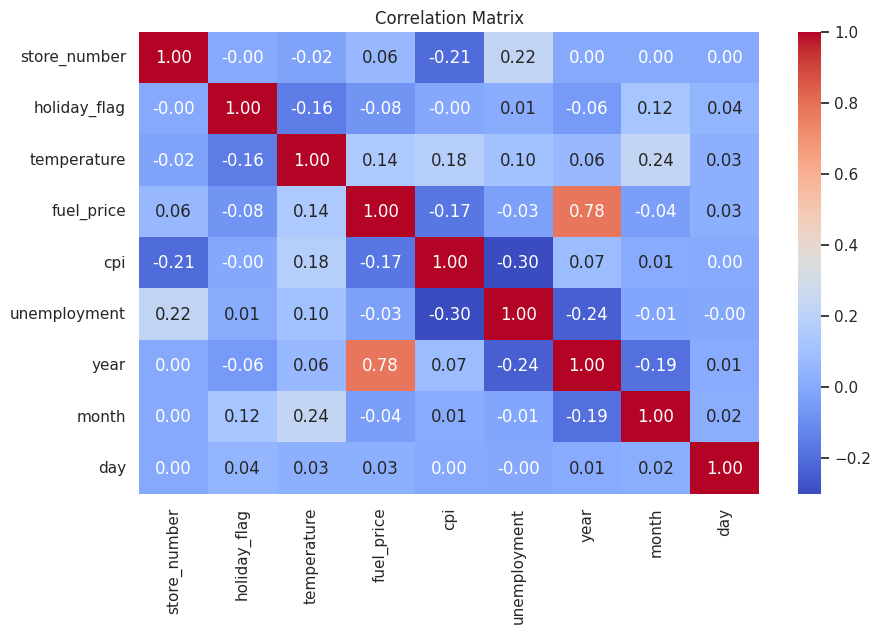

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# STEP 7: Time Series Trend

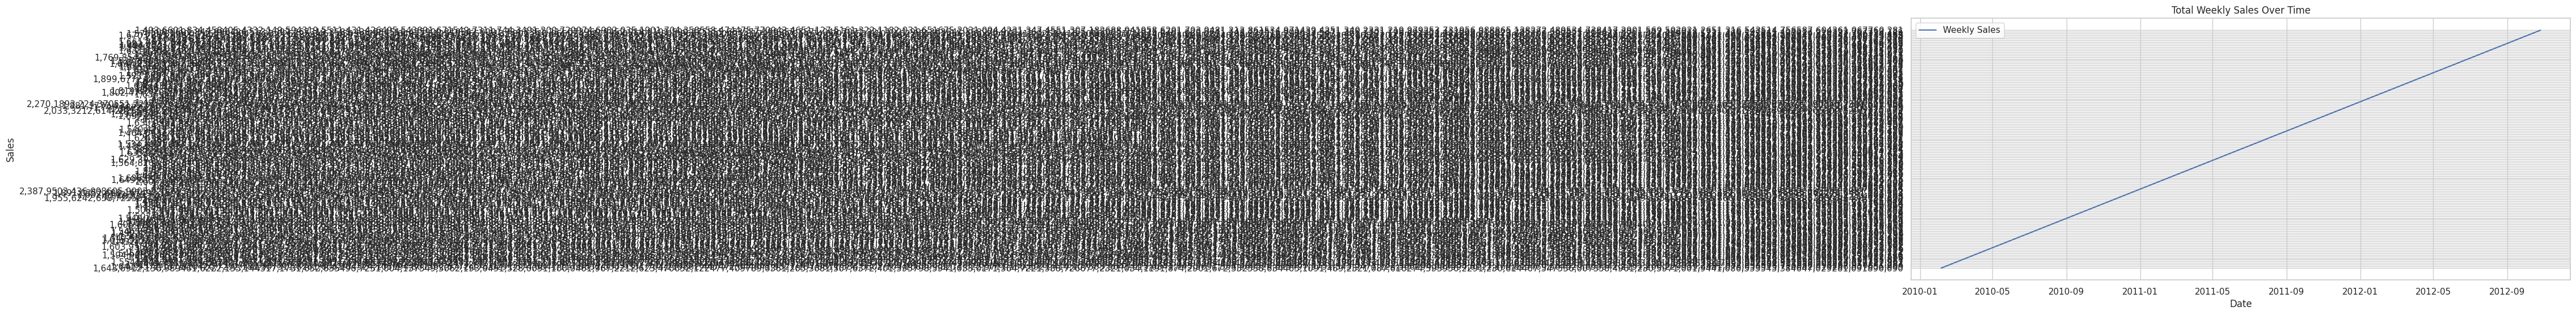

In [22]:
df_ts = df.groupby('date')['weekly_sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(df_ts['date'], df_ts['weekly_sales'], label='Weekly Sales')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

# STEP 8: Final Summary & Insights

## Top 5 Weeks with Highest Sales

In [23]:
print(" Top 5 Weeks with Highest Sales:")
print(df.sort_values('weekly_sales', ascending=False)[['date', 'weekly_sales']].head())

 Top 5 Weeks with Highest Sales:
           date weekly_sales
5682 2012-02-10      999,785
4841 2012-06-08      999,511
3577 2010-02-19      999,349
4829 2012-03-16      999,298
4838 2012-05-18      998,673


## Most Profitable Month

In [24]:
monthly = df.groupby('month')['weekly_sales'].sum()
most_profitable_month = monthly.idxmax()
print(f"\n Most Profitable Month (Overall): {most_profitable_month}")


 Most Profitable Month (Overall): 2
